# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import os
import math

import sklearn.tree
import sklearn.ensemble

from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA

In [3]:
df_raw = pd.read_csv("data/ML-MATT-CompetitionQT1920_train.csv",encoding='latin1')
df_test = pd.read_csv("data/ML-MATT-CompetitionQT1920_test.csv",encoding='latin1')

## Exploratory Data Analysis

In [4]:
df = df_raw.copy()
df.head(10)

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7,1
1,9:45,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10,1
2,7:45,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2,1
3,2:45,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4,1
4,3:30,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3,0
5,13:30,9ALTE,15.966,1.819,0.415,0.071,10.116,0.706,1.364,1.314,6.0,5.0,11,0
6,20:00,9BLTE,7.074,0.505,0.032,0.012,1.680,0.131,1.041,1.041,3.0,3.0,6,0
7,8:00,4BLTE,7.960,1.393,0.299,0.025,24.697,0.451,1.075,1.015,3.0,3.0,6,1
8,16:45,4CLTE,26.879,3.032,0.525,0.120,9.145,0.894,1.425,1.273,6.0,5.0,11,0
9,4:15,6CLTE,4.143,0.505,0.021,0.013,0.409,0.437,1.021,0.010,2.0,2.0,4,0


In [5]:
df.describe()

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,Unusual
count,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36904.000000,36815.000000,36815.000000,36904.000000
mean,7.835090,2.106396,0.560525,0.067610,17.764369,1.791974,1.173441,0.665143,4.190819,3.063371,0.275932
std,8.428206,2.247514,0.727623,0.186555,15.739932,5.028928,0.214065,0.535493,1.772484,1.387446,0.446989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.213000,0.707000,0.140000,0.021000,5.710750,0.362000,1.041000,0.010000,3.000000,2.000000,0.000000
50%,4.547000,1.314000,0.352000,0.040000,14.170000,0.703000,1.112000,1.011000,4.000000,3.000000,0.000000
75%,12.126000,2.728000,0.718000,0.075000,25.059500,1.242000,1.263000,1.051000,5.000000,4.000000,1.000000
max,51.333000,77.505000,19.601000,12.461000,140.008000,48.253000,2.915000,2.668000,12.000000,12.000000,1.000000


Lets visualize how many Unusual cases we have in this dataset

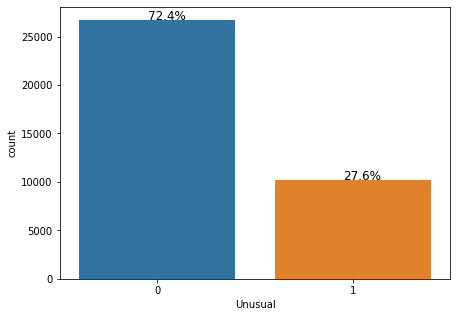

In [6]:
plt.figure(figsize=(7,5))
ax = sns.countplot('Unusual', data = df)
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)

In [7]:
n_normal= len(df[df.Unusual==0])
n_unusual= len(df[df.Unusual==1])

anomaly_fraction = n_unusual / n_normal
anomaly_fraction_2 = n_unusual /(n_unusual+ n_normal)

We have 27.6% Unusual cases in the dataset which are anomalies.


**Let's explore the distribution of Unusual activities across numerical features of dataset**

In [8]:
#sns.pairplot(data=df, hue="Unusual")

Following is a visual representation of corresponding features categorized based on "Normal" and "Unusual" activities:

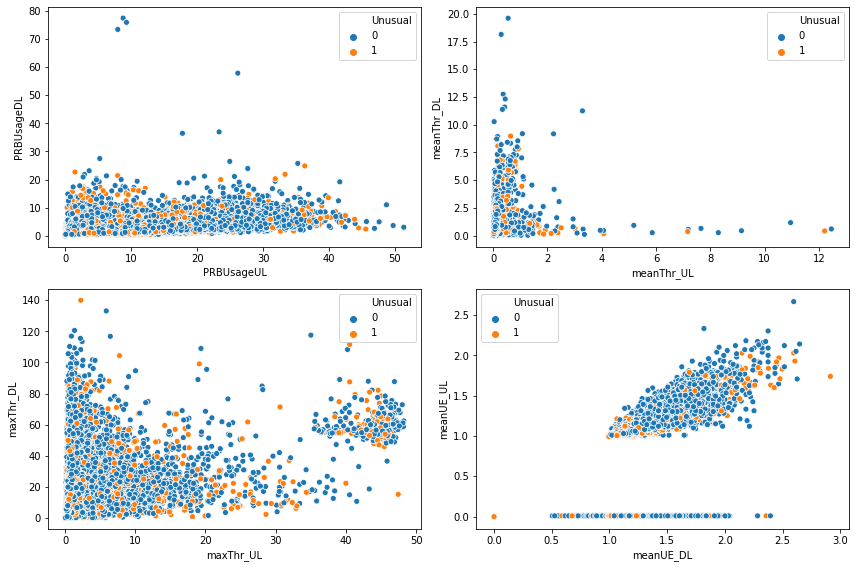

In [9]:
fig, axs = plt.subplots(2,2, figsize=(12,8))
sns.scatterplot(ax=axs[0, 0], x="PRBUsageUL",y="PRBUsageDL",hue="Unusual",data=df)
sns.scatterplot(ax=axs[0, 1], x="meanThr_UL",y="meanThr_DL",hue="Unusual",data=df)
sns.scatterplot(ax=axs[1, 0], x="maxThr_UL",y="maxThr_DL",hue="Unusual",data=df)
sns.scatterplot(ax=axs[1, 1], x="meanUE_DL",y="meanUE_UL",hue="Unusual",data=df)
plt.tight_layout()

## Investigation of Non Quantitative Features

**Time Relevance Investigation**

The feature "Time" contains the hour of the day (in the format hh:mm) when the sample was generated. Let's investigate its correlation with Normal and Unusual activities:

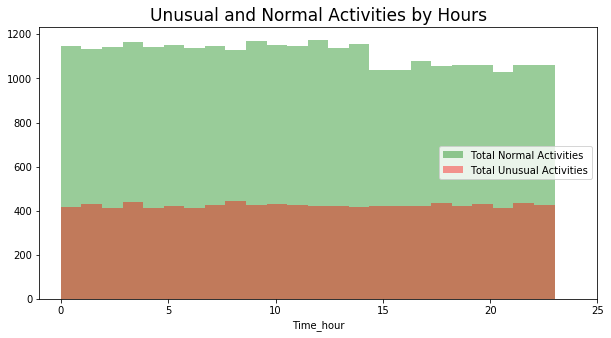

In [10]:
df['Time_hour'] = (df['Time'].apply(lambda x:x.split(":")[0])).astype(int)

plt.figure(figsize=(10,5))
sns.distplot(df[df['Unusual'] == 0]["Time_hour"], kde=False, color='g', bins=24)
sns.distplot(df[df['Unusual'] == 1]["Time_hour"], kde=False, color='r', bins=24)
plt.title('Unusual and Normal Activities by Hours', fontsize=17)
#plt.legend(labels=['Total Normal Activities','Total Unusual Activities'])
plt.legend(loc='center right', labels=['Total Normal Activities','Total Unusual Activities'])
plt.xlim([-1,25])
plt.show()

No clear relationship is evident from the plot and in fact, the total activities are extremely similar across hours. So, let's drop the time column:

In [11]:
df = df.drop('Time',axis=1)
df = df.drop('Time_hour',axis=1)

**CellName Relevance Investigation**


The feature "CellName" contains text string to uniquely identify the cell that generated the current sample. CellName is in the form xαLTE, where x identifies the base station, and α the cell within that base station. 

Let's investigate its correlation with Normal and Unusual activities:

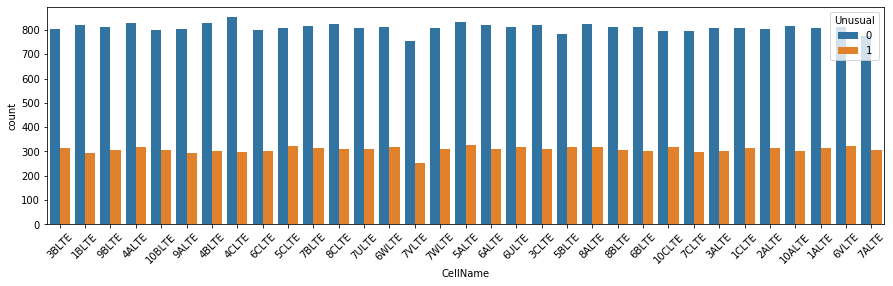

In [12]:
plt.figure(figsize=(15,4))
sns.countplot(x='CellName', data =df, hue ='Unusual')
plt.xticks(rotation=45);

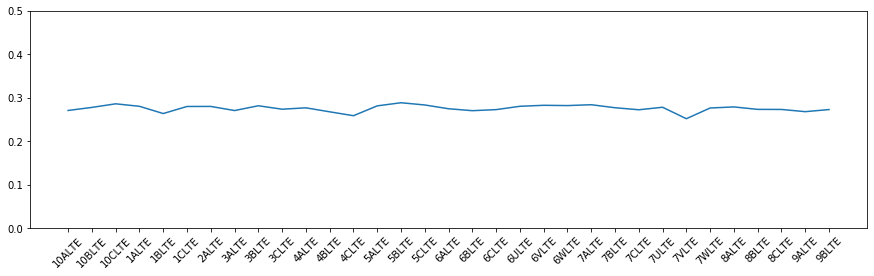

In [13]:
Series_Total = df.groupby("CellName")['Unusual'].count()
Series_Normal = df[df['Unusual']==0].groupby("CellName")['Unusual'].count()
Series_Unusual = df[df['Unusual']==1].groupby("CellName")['Unusual'].count()
plt.figure(figsize=(15,4))
plt.plot(Series_Unusual / Series_Total)
plt.ylim([0,0.5])
plt.xticks(rotation=45);

No clear relationship is evident from the plot and in fact, the total activities are extremely similar across different values of "CellName". So, let's drop the "CellName" column:

In [14]:
df = df.drop('CellName',axis=1)

## Missing Data

Let's explore missing data columns. Following function list the missing values and their column names:

In [15]:
def missing_columns(dataframe):
    """
    Returns a dataframe that contains missing column names and 
    percent of missing values in relation to the whole dataframe.
    
    dataframe: dataframe that gives the column names and their % of missing values
    """
    
    # find the missing values
    missing_values = dataframe.isnull().sum().sort_values(ascending=False)
    
    # percentage of missing values in relation to the overall size
    missing_values_pct = 100 * missing_values/len(dataframe)
    
    
    # find Unusual missing values
    missing_values_Unusual = dataframe[dataframe['Unusual']==1].isnull().sum().sort_values(ascending=False)
    
    # percentage of missing values in relation to the overall Unusual cases
    missing_values_pct_Unusual = 100 * missing_values/len(dataframe[dataframe['Unusual']==1])
    
    # create a new dataframe which is a concatinated version
    concat_values = pd.concat([missing_values, missing_values_pct.round(1), missing_values_Unusual, missing_values_pct_Unusual.round(2)],axis=1)

    # give new col names
    concat_values.columns = ['Total Missings', 'Missing Count %','Total Missings (Unusual)', 'Missing Count (Unusual) %']
    
    # return the required values
    return concat_values[concat_values.iloc[:,1]!=0]


In [16]:
missing_columns(df)

,Total Missings,Missing Count %,Total Missings (Unusual),Missing Count (Unusual) %
maxUE_UL,89,0.2,16,0.87
maxUE_DL,89,0.2,16,0.87


There are ~0.2% data recording with missing values, among them there are 16 Unusual cases which is equivalent if less than 1% of Unusual cases. Considering that 27.6% of total dataset are Unusual cases, it makes sense to drop the rows with missing values.

In [17]:
print("The length of original data set = ", len(df))
df = df.dropna()
print("The length of data set with no missing values= ", len(df))

The length of original data set =  36904
The length of data set with no missing values=  36815


In [18]:
df = df.apply(pd.to_numeric)

## Correlation Between Feature Variables

Let's explore correlation between all continuous numeric feature variables using .corr() method. Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.

In [19]:
df.corr()

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
PRBUsageUL,1.000000,0.448988,0.482418,0.285751,0.461749,0.217429,0.687966,0.550847,0.713524,0.812626,0.783633,-0.116976
PRBUsageDL,0.448988,1.000000,0.792940,0.250754,0.452556,0.298186,0.634644,0.002985,0.618984,0.603546,0.633714,-0.089477
meanThr_DL,0.482418,0.792940,1.000000,0.299491,0.629519,0.486343,0.510377,0.087323,0.499982,0.508359,0.521354,-0.064953
meanThr_UL,0.285751,0.250754,0.299491,1.000000,0.199488,0.409921,0.246288,0.027326,0.239803,0.245076,0.250624,-0.034869
maxThr_DL,0.461749,0.452556,0.629519,0.199488,1.000000,0.337328,0.447410,0.126392,0.507722,0.479198,0.512595,-0.066063
maxThr_UL,0.217429,0.298186,0.486343,0.409921,0.337328,1.000000,0.157302,-0.077578,0.185757,0.182006,0.190578,-0.020547
meanUE_DL,0.687966,0.634644,0.510377,0.246288,0.447410,0.157302,1.000000,0.230203,0.876911,0.833129,0.887819,-0.177905
meanUE_UL,0.550847,0.002985,0.087323,0.027326,0.126392,-0.077578,0.230203,1.000000,0.196902,0.357789,0.276943,-0.027915
maxUE_DL,0.713524,0.618984,0.499982,0.239803,0.507722,0.185757,0.876911,0.196902,1.000000,0.864536,0.973563,-0.138684
maxUE_UL,0.812626,0.603546,0.508359,0.245076,0.479198,0.182006,0.833129,0.357789,0.864536,1.000000,0.956477,-0.118986


**Utilizing Heatmap to Visualize Correlation Between Feature Variables.**

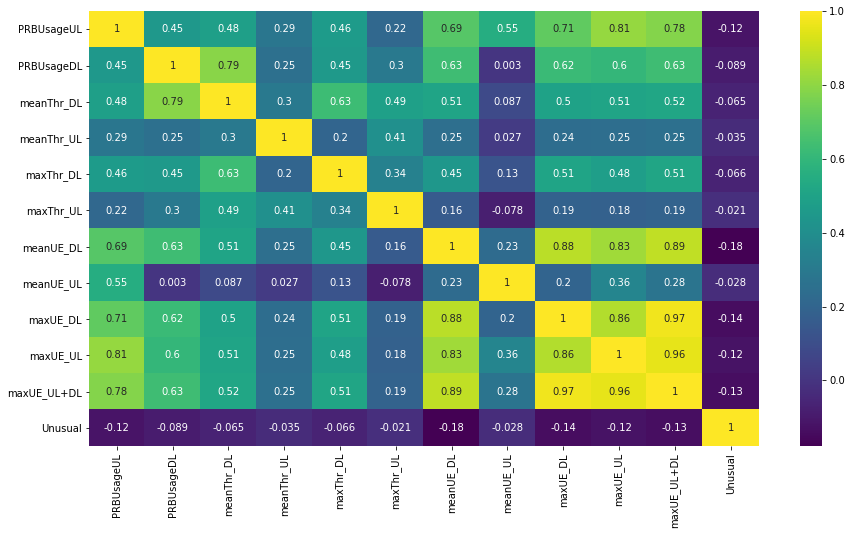

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

Based on the heatmap the following three features are highly correlated:

**maxUEDL, maxUEUL, and maxUE_UL+DL**


### Multicollinearity 
The highly correlated features is an indication of redundancy of features and pose a potential risk to the accuracy of ML models.

**Variation Inflation Factor (VIF) utilized to quantify the degree of Multicollinearity.**

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF_report(input_data):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["Feature"] = input_data.columns
  
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(input_data.values, i)
                          for i in range(len(input_data.columns))]
  
    display(HTML(vif_data.to_html()))

In [22]:
VIF_report(df)   

,Feature,VIF
0,PRBUsageUL,7.682292
1,PRBUsageDL,7.291296
2,meanThr_DL,7.177465
3,meanThr_UL,1.447954
4,maxThr_DL,4.396230
5,maxThr_UL,1.746526
6,meanUE_DL,27.535386
7,meanUE_UL,4.482116
8,maxUE_DL,inf
9,maxUE_UL,inf


The value of **inf** for VIF indicates a perfect correlation, thus the columns can be dropped.

In [23]:
df = df.drop('maxUE_DL',axis=1)
VIF_report(df)

,Feature,VIF
0,PRBUsageUL,7.682292
1,PRBUsageDL,7.291296
2,meanThr_DL,7.177465
3,meanThr_UL,1.447954
4,maxThr_DL,4.396230
5,maxThr_UL,1.746526
6,meanUE_DL,27.535386
7,meanUE_UL,4.482116
8,maxUE_UL,82.292923
9,maxUE_UL+DL,113.382678


In [24]:
df = df.drop('maxUE_UL+DL',axis=1)
VIF_report(df)

,Feature,VIF
0,PRBUsageUL,7.219581
1,PRBUsageDL,7.052079
2,meanThr_DL,7.040490
3,meanThr_UL,1.447886
4,maxThr_DL,4.229949
5,maxThr_UL,1.744822
6,meanUE_DL,18.668878
7,meanUE_UL,4.124259
8,maxUE_UL,30.404953
9,Unusual,1.367439


In [25]:
df = df.drop('maxUE_UL',axis=1)
VIF_report(df)

,Feature,VIF
0,PRBUsageUL,4.231607
1,PRBUsageDL,6.356108
2,meanThr_DL,6.850264
3,meanThr_UL,1.446591
4,maxThr_DL,4.166274
5,maxThr_UL,1.744033
6,meanUE_DL,6.321088
7,meanUE_UL,4.117519
8,Unusual,1.367345


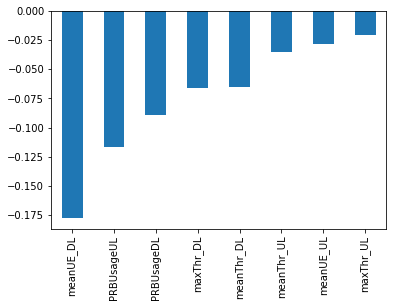

In [26]:
df.corr()['Unusual'].drop(labels=['Unusual']).sort_values().plot(kind='bar')

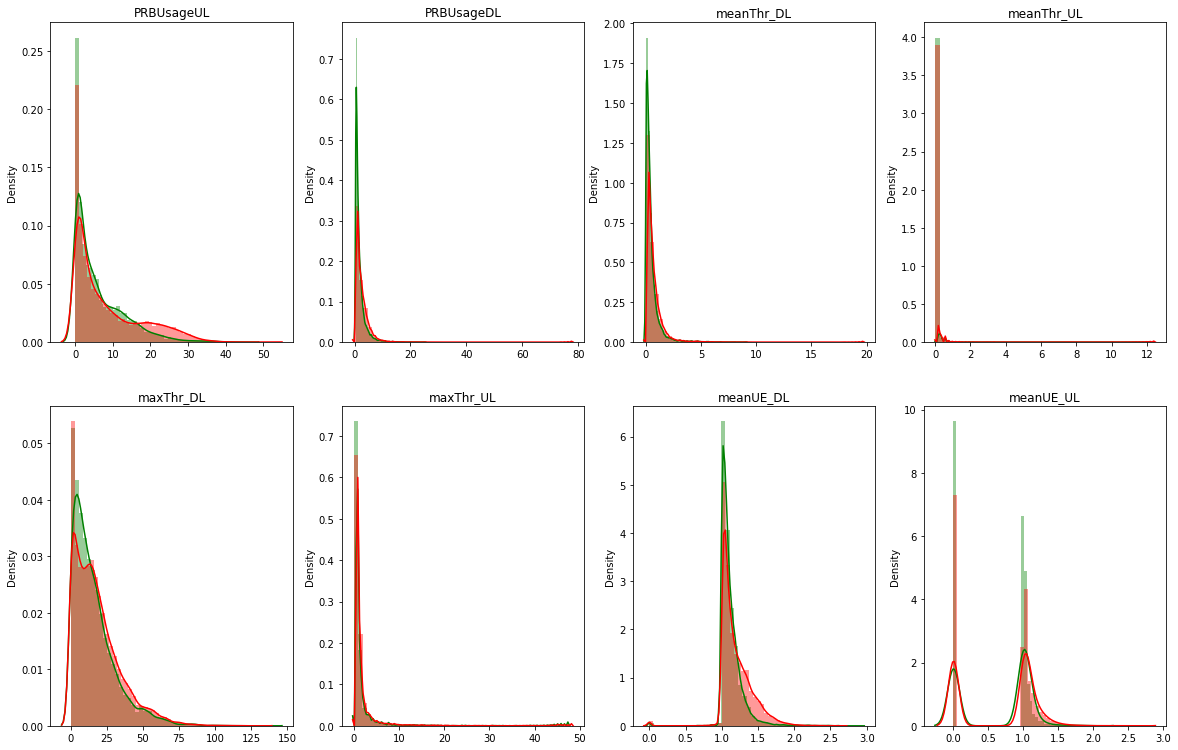

In [27]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(3, 4)

plt.figure(figsize=(20,10*2))

X_features = list((df.drop('Unusual', axis='columns')).columns)
for n, col in enumerate(X_features):
    ax = plt.subplot(grid[n])
    sns.distplot(df[df.Unusual==1][col], bins = 50, color='g')
    sns.distplot(df[df.Unusual==0][col], bins = 50, color='r') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    
plt.show()

As we can see that data distribution of normal and unusual cases of some features like XXX are overlapping and they seem same. Such features are not good at differentiating between normal and unusual activities.

## Feature Selection using Z-test

Lets move to do some hypothesis testing to find statistically significant features. We will be performing `Z-test` with normal activities as our population. 

So the case is we have to find if the values of unusual activities are significantly different from normal activities or not for all features. The level of significance is 0.05 and its a two tailed test.

#### Scenario:
* Normal activities as our population
* Unusual activities as sample
* Two tailed Z-test
* Level of significance 0.05
* Corresponding critical value is 1.960

#### Hypothesis:
* H0: There is no difference (insignificant)
* H1: There is a difference  (significant)

#### Formula for z-score:

$$ Zscore = (\bar{x} - \mu) / S.E$$

In [28]:
def ztest(feature):
    
    mean = normal[feature].mean()
    std = unusual[feature].std()
    zScore = (unusual[feature].mean() - mean) / (std/np.sqrt(sample_size))
    
    return zScore

In [29]:
columns= df.drop('Unusual', axis=1).columns

normal= df[df.Unusual==0]
unusual= df[df.Unusual==1]

sample_size=len(unusual)
significant_features=[]
critical_value=1.960

for i in columns:
    
    z_vavlue=ztest(i)
    
    if( abs(z_vavlue) >= critical_value):    
        print(i," is statistically significant") #Reject Null hypothesis. i.e. H0
        significant_features.append(i)
    else:
        print(i," is rejected") #Reject Null hypothesis. i.e. H0

PRBUsageUL  is statistically significant
PRBUsageDL  is statistically significant
meanThr_DL  is statistically significant
meanThr_UL  is statistically significant
maxThr_DL  is statistically significant
maxThr_UL  is statistically significant
meanUE_DL  is statistically significant
meanUE_UL  is statistically significant


Since all of the features are statistically significant they can be kept in the model

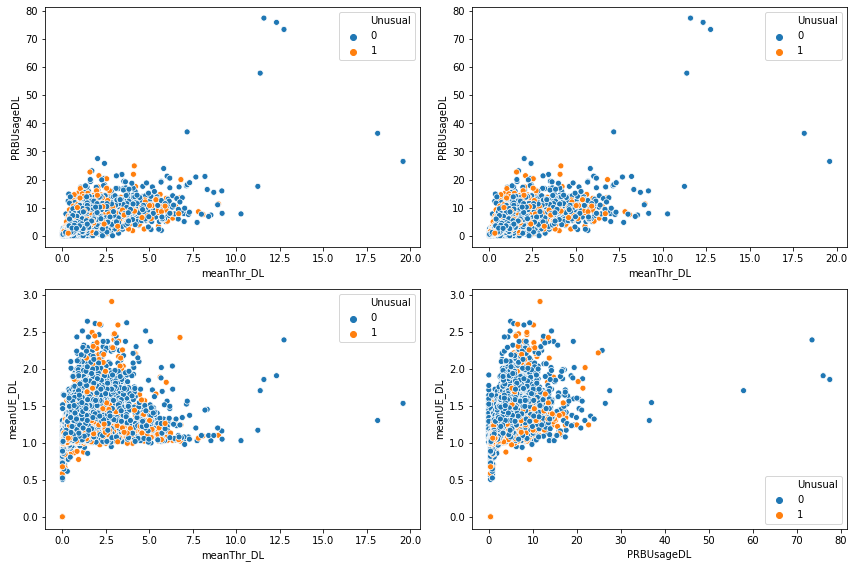

In [30]:
fig, axs = plt.subplots(2,2, figsize=(12,8))
sns.scatterplot(ax=axs[0, 0], x="meanThr_DL",y="PRBUsageDL",hue="Unusual",data=df)
sns.scatterplot(ax=axs[0, 1], x="meanThr_DL",y="PRBUsageDL",hue="Unusual",data=df)
sns.scatterplot(ax=axs[1, 0], x="meanThr_DL",y="meanUE_DL",hue="Unusual",data=df)
sns.scatterplot(ax=axs[1, 1], x="PRBUsageDL",y="meanUE_DL",hue="Unusual",data=df)
plt.tight_layout()

## Feature Transformation

In [31]:
# Separate labels from data 
X = (df.drop('Unusual', axis='columns'))
X_features = list(set(X.columns))
X = X.to_numpy()
y = (df['Unusual']).to_numpy()

### PCA Analysis

PCA is effected by scale so we need to scale the features in dataset before applying PCA.

In [32]:
#Let's now transform our data so that the distributions are closer to standard normal distributions. 
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [33]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
X_reduce = pca.fit_transform(X_norm)

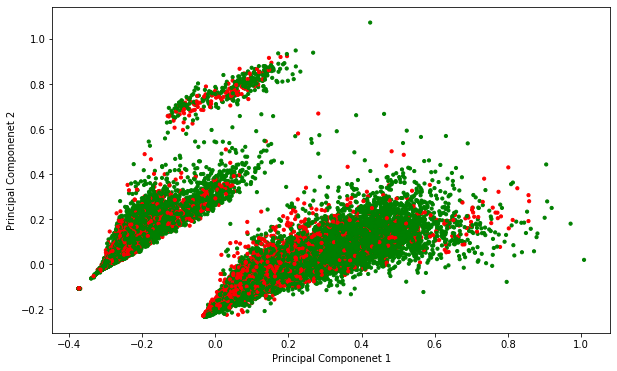

In [34]:
colors=['green' if l==0 else 'red' for l in y]
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.scatter(X_reduce[:,0], X_reduce[:, 1], s=10, alpha=1,color=colors)
plt.xlabel("Principal Componenet 1")
plt.ylabel("Principal Componenet 2")
plt.show()

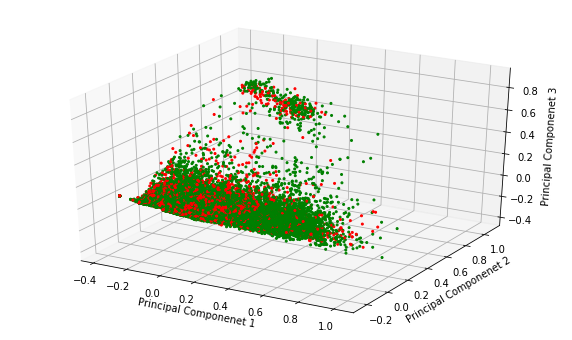

In [35]:
colors=['green' if l==0 else 'red' for l in y]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduce[:,0], X_reduce[:, 1], X_reduce[:, 2], s=4, alpha=1,color=colors)
ax.set_xlabel("Principal Componenet 1")
ax.set_ylabel("Principal Componenet 2")
ax.set_zlabel("Principal Componenet 3")
plt.show()

PCA tries to provide the projection using the correlation between some dimensions and keeping the maximum amount of information about the original data distribution. As can be seen in above image, there are not clear clusters nor a clear defined pattern. Normal and unusual samples are mixed in many ways wich limit the options for the classifier that is going to be used, e.g linear classifiers can be directly excluded.

### t-SNE
t-SNE is an unsupervised non-linear reduction method to minimize the divergence between a distribution that measures pairwise similarities of the input and a distribution that measures the similarities of the corresponding low-dimensional points in the embedding. As it can be observed in the figure below, t-SNE has built a set of separable clusters but with samples of different classes mixed in the same clusters, without a clear visual pattern.


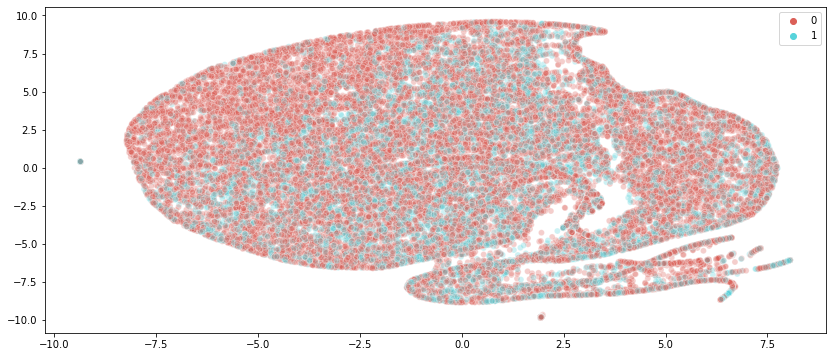

In [36]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

df_subset={}
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['Labels'] = y

plt.figure(figsize=(14,6))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue="Labels",palette=sns.color_palette("hls", 2),data=df_subset,legend="full",alpha=0.3)

## Supervised Classification Modeling

XGBoost algorithm indicated a superior performance for classification tasks as demonstrated in my previous project (available on GitHub). 
Please find complete discerption of previous project from the following link:


[Comprehensive Evaluation of Machine Learning Techniques to Predict Customer Default](https://github.com/majid-hosseini/Machine-Learning-Techniques-to-Predict-Customer-Default)

Performing a train/test split with test_size=0.2 and forcing a similar distribution of Unusual cases (stratify=y).

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
class_names = ['Normal', 'Unusual']

### Helper Functions:

In [38]:
import sklearn.metrics as metrics
from IPython.display import display, HTML
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

def metrics_report_to_df(ytrue, ypred):
    """
    format classifier accuracy metrics to a pandas dataframe for printing purposes.
    """
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(ytrue, ypred, zero_division=1)
    classification_report = pd.concat(map(pd.DataFrame, [precision, recall, fscore, support]), axis=1)
    classification_report.index = class_names
    classification_report.columns = ["precision", "recall", "f1-score", "support"] # Add row w "avg/total"
    classification_report.loc['avg/Total', :] = metrics.precision_recall_fscore_support(ytrue, ypred, average='weighted', zero_division=1)
    classification_report.loc['avg/Total', 'support'] = classification_report['support'].sum() 
    return(classification_report)

def model_report(model_name, y_test, predictions):
    """
    printing confusion matrix in a nice table format.    
    """
    cm = metrics.confusion_matrix(y_test, predictions)
    confusion_tabular = pd.DataFrame(cm)
    confusion_tabular.columns = ['      Predcited: Normal ', '      Predcited: Unusual']
    confusion_tabular.index = ['Actual: Normal', 'Actual: Unusual']
    confusion_tabular.iloc[0,0] = "TN = " + str(confusion_tabular.iloc[0,0])
    confusion_tabular.iloc[0,1] = "FP = " + str(confusion_tabular.iloc[0,1])
    confusion_tabular.iloc[1,0] = "FN = " + str(confusion_tabular.iloc[1,0])
    confusion_tabular.iloc[1,1] = "TP = " + str(confusion_tabular.iloc[1,1])
    print("\n")
    print (" Unusual Activity Prediction using " + model_name + "\n")
    display(HTML(confusion_tabular.to_html()))

    classification_report = metrics_report_to_df(y_test, predictions)
    display(HTML(classification_report.to_html()))
    print("")


In [39]:
from sklearn.metrics import plot_confusion_matrix
def tile_plot_confusion_matrix(model, X_test, y_test, class_names):
    """
    printing confusion matrix in graphic tile format.    
    """
    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    titles_options = titles_options[1:]
    np.set_printoptions(precision=2)    
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, X_test, y_test,display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
        disp.ax_.set_title(title)
    plt.show()

In [40]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

The following function uses GridSearchCV to fit multiple classifiers according to the combinations of parameters in the param_grid. The scores from scorers are recorded and will be printed in a table format. The best model (based on the defined score) will be selected and "refit" to the full training data. Also, the confusion matrix in both table format and graphical format is presented using the held out X_test to show performance.

In [41]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
def grid_search_wrapper(classifier, X_train, y_train, X_test, y_test, refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    clf = classifier
    skf = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True)
    grid_search.fit(X_train, y_train);
    
    results = pd.DataFrame(grid_search.cv_results_)
    results = results.sort_values(by=('mean_test_' + refit_score), ascending=False)

    list_param = list(param_grid.keys())
    columns = ['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score'] + [('param_' + str) for str in list_param]
    results[columns].round(3).head()
    display(HTML((results[columns].round(3).head()).to_html()))

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    model_report("Best of GridSearchCV", y_test, y_pred)
    tile_plot_confusion_matrix(grid_search, X_test, y_test, class_names)
    return grid_search

### Extreme Gradient Boost Model
XGBoost Tree boosting is a highly effective and widely used machine learning method which offers advantages on computational speed and model performance. The three main forms of gradient boosting implementation are:

Gradient Boosting algorithm also called gradient boosting machine including the learning rate.
Stochastic Gradient Boosting with sub-sampling at the row, column and column per split levels.
Regularized Gradient Boosting with both L1 and L2 regularization.
Some key algorithm implementation features to make the best use of available resources to train the model include:

Sparse Aware implementation with automatic handling of missing data values.
Block Structure to support the parallelization of tree construction.
Continued Training so that you can further boost an already fitted model on new data.
In the Gradient boosting approach, new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It uses a gradient descent algorithm to minimize the loss when adding new models and that's why it is called gradient boosting because .

In [42]:
from xgboost import XGBClassifier

clf = XGBClassifier(eval_metric='logloss')
param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.1, 0.15, 0.2]
}

In following I will use GridSearchCV to search for the best hyperparameters and tune the model to achive the highest recall score.

First let's build a generic classifier and setup a parameter grid to use GridSearchCV and investigate the influence of some tunable parameters. The scoring argument in GridSearchCV is a dictionary enables us to score different models based on precision_score, recall_score, accuracy_score, and f1_score.

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_n_estimators,param_max_depth,param_learning_rate
20,0.998,0.977,0.993,600,5,0.2
11,0.998,0.976,0.993,600,5,0.15
19,0.998,0.975,0.993,400,5,0.2
14,0.998,0.975,0.992,600,10,0.15
23,0.998,0.974,0.992,600,10,0.2


Best params for recall_score
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 600}


 Unusual Activity Prediction using Best of GridSearchCV



,Predcited: Normal,Predcited: Unusual
Actual: Normal,TN = 5328,FP = 2
Actual: Unusual,FN = 32,TP = 2001


,precision,recall,f1-score,support
Normal,0.994030,0.999625,0.996819,5330.0
Unusual,0.999001,0.984260,0.991576,2033.0
avg/Total,0.995403,0.995382,0.995372,7363.0


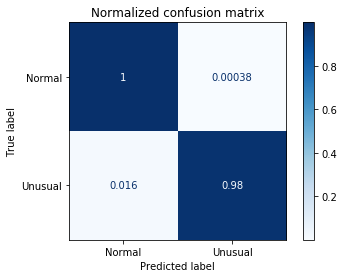

In [43]:
grid_search_XGBClassifier = grid_search_wrapper(clf, X_train, y_train, X_test, y_test, refit_score='recall_score')


# Threshold-tuning and Trade offs :

In a binary classification problem with class labels 0 and 1, a default threshold of 0.5 is usually used. It means the cases with predicted probabilities less than the threshold of 0.5 are assigned to class 0 and values greater than or equal to 0.5 are assigned to class 1.

The problem is that the default threshold may not represent an optimal interpretation of the predicted probabilities. This might be the case for a number of reasons, such as severely skewed class distribution or if the cost of one type of misclassification is more important than another type of misclassification.

Tuning or shifting the decision threshold in order to accommodate the broader requirements of the classification problem is generally referred to as “threshold-moving,” “threshold-tuning,” or simply “thresholding.”

Obviously, there will be some error associated with every model results in False Positives and False Negatives due to the model classifying things incorrectly as compared to the actual class. There might be the cases where we might want to minimise either False Positives or False negatives depends on the business needs and the context of the problem. Modifying the decision threshold of the model is basically tradeoff between sensitivity and specificty which can be visualized by using precision_recall_curve and roc_curve.

In [44]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def Input_threshold_model_output(model_name, model, X_test, y_test, threshold = 0.5):
    y_scores = model.predict_proba(X_test)[:, 1]
    y_pred_adj = adjusted_classes(y_scores, threshold)
    model_report(model_name, y_test, y_pred_adj)



In [45]:
Input_threshold_model_output("Gradient Boosting Classifier", grid_search_XGBClassifier, X_test, y_test, threshold = 0.1)



 Unusual Activity Prediction using Gradient Boosting Classifier



,Predcited: Normal,Predcited: Unusual
Actual: Normal,TN = 5299,FP = 31
Actual: Unusual,FN = 15,TP = 2018


,precision,recall,f1-score,support
Normal,0.997177,0.994184,0.995678,5330.0
Unusual,0.984871,0.992622,0.988731,2033.0
avg/Total,0.993779,0.993753,0.993760,7363.0


In [46]:
def plot_importance(df):
    """
    Builds the dataset to plot the feature importance.
    
    """
    # Sort features according to importance
    df = df.sort_values(['Importance'],ascending=False).reset_index()
    
    # drop the old index to avoid confusion
    df = df.drop(['index'],axis=1)
    
    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 9))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:30]))), 
            df['Importance'].head(30), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:30]))))
    ax.set_yticklabels(df['Feature'].head(30))
    
    plt.xlabel("Normalized feature importance")
    plt.ylabel("Features")
    
    plt.show()
    return df

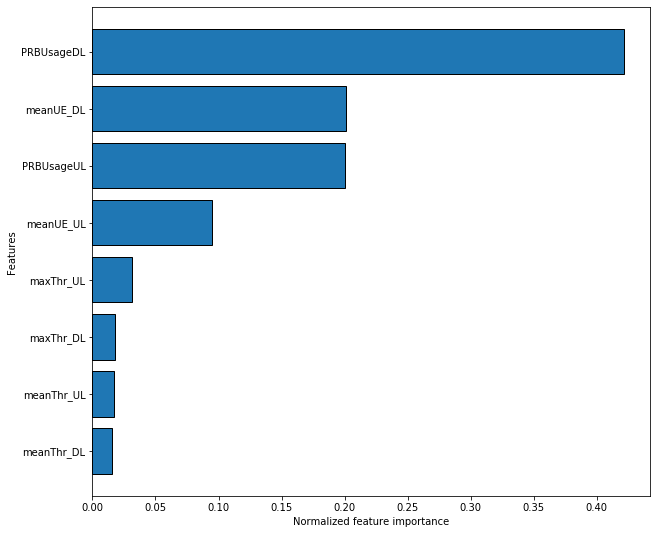

In [47]:
feature_importances_res = grid_search_XGBClassifier.best_estimator_.feature_importances_
feature_importance_df = pd.DataFrame({'Feature':X_features,'Importance':feature_importances_res})

#feature_importance_df = pd.DataFrame({'Feature':features,'Importance':clf.feature_importances_})
sorted_importance = plot_importance(feature_importance_df)

Here adjusted_classes is a simple function to return a modified version of y_scores that was calculated above, only now class labels will be assigned according to the probability threshold t. The other function below plots the precision and recall with respect to the given threshold value, t.

A precision-recall curve focuses on the performance of a classifier on the positive class only. Precision describes how good a model is at predicting the positive clas where Recall is the hit rate of the model. Recall is the same as sensitivity.

A precision-recall curve is plotted by calculating the precision and recall for each threshold. We use the grid_search_ran_forest model and dataset from the previous section and evaluate the probability predictions using a precision-recall curve. The precision_recall_curve() function can be used to calculate the curve, returning the precision and recall scores for each threshold as well as the thresholds used.

Identifying a threshold that results in the best balance of precision and recall is the same as optimizing the F1-score that summarizes the harmonic mean of both measures.

F1-score = (2 Precision Recall) / (Precision + Recall)

In the following function, the optimal threshold is calculate by finding the maximum F1-score.

In [48]:
def optimize_thresholds_precision_recall(model_name, model, X_test, y_test):
    y_scores = model.predict_proba(X_test)[:, 1]
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

    """
    plots the precision recall curve and shows the corresponding value for thresholds with highest f1-score.
    """
        
    # convert to f score
    fscore = (2 * precisions * recalls) / (precisions + recalls)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
    
        
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, thresholds[ix])
    model_report("adjusted_classes", y_test, y_pred_adj)

    # plot the curve    
    fig, axs = plt.subplots(1,2, figsize=(14,6))
    axs[0].plot(thresholds, precisions[:-1], "b--", label="Precision")
    axs[0].plot(thresholds, recalls[:-1], "g-", label="Recall")
    axs[0].legend(loc='best')
    axs[0].set_title('Precision and Recall Scores as a function of the decision threshold')
    axs[0].set(xlabel='Decision Threshold')
    axs[0].set(ylabel='Score')


    axs[1].step(recalls, precisions, color='b', alpha=0.2, where='post')
    axs[1].fill_between(recalls, precisions, step='post', alpha=0.2, color='b')
    axs[1].plot(recalls[ix], precisions[ix], 'v', c='k', markersize=10, label='Best')
    #axs[1].scatter(recalls[ix], precisions[ix], marker='v', color='black', label='Best')   
    axs[1].legend(loc='best')
    axs[1].set_title('Precision and Recall curve')
    axs[1].set(xlabel='Recall')
    axs[1].set(ylabel='Precision')

Best Threshold=0.289412, F-Score=0.993


 Unusual Activity Prediction using adjusted_classes



,Predcited: Normal,Predcited: Unusual
Actual: Normal,TN = 5324,FP = 6
Actual: Unusual,FN = 22,TP = 2011


,precision,recall,f1-score,support
Normal,0.995885,0.998874,0.997377,5330.0
Unusual,0.997025,0.989179,0.993086,2033.0
avg/Total,0.996200,0.996197,0.996193,7363.0


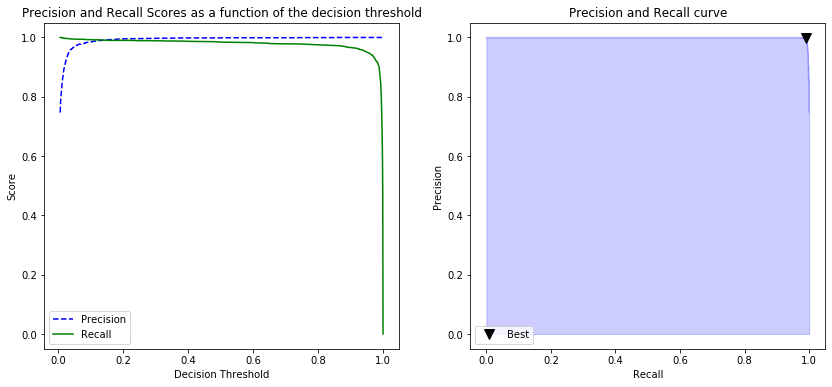

In [49]:
optimize_thresholds_precision_recall("Grid Search Extreme Gradient Boost", grid_search_XGBClassifier, X_test, y_test)


A ROC (Receiver Operating Characteristic) curve is a diagnostic plot that evaluates a set of probability predictions made by a model on a test dataset using a set of different thresholds. The true positive rate and the false positive rate of the predictions are plotted in a line of increasing thresholds to create a curve.

A random classifier is presented by a diagonal line on the plot from the bottom-left to top-right indicates the “curve” for a no-skill classifier (predicts the majority class in all cases).

The trade-off in the true-positive rate and false-positive rate for different thresholds is clearly represented in ROC curve. The area under the ROC Curve (ROC-AUC), provides a single number to summarize the performance of a model based on its general capabilities with a value between 0.5 (no-skill) and 1.0 (perfect skill).

A balance between false positive and true positive rates can be acheived by using an optimal threshold on the curve that is closest to the top-left of the plot. Following is one approach to identify the optimal threshold:

Sensitivity = TruePositive / (TruePositive + FalseNegative) Specificity = TrueNegative / (FalsePositive + TrueNegative)

Where:

Sensitivity = True Positive Rate Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will find a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value. Given that we have already calculated the Sensitivity (TPR) and the complement to the Specificity when we calculated the ROC Curve, we can calculate the G-Mean for each threshold directly

In [50]:
def optimize_thresholds_roc(model_name, model, X_test, y_test):
    y_scores = model.predict_proba(X_test)[:, 1]
    #precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

    """
    plots the roc curve and shows the corresponding value for thresholds with closest point to the perfect predictor.
    """
    
    # plot the curve
    plt.figure(figsize=(6,6))
    plt.title("ROC Curve")
    fpr, tpr, roc_thresholds = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, linewidth=2, label=str(model_name) + ', AUC = %0.4f' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

    plt.legend(loc='best')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')

    # calculate the g-mean for each threshold
    gmeans = np.sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (roc_thresholds[ix], gmeans[ix]))
    # plot the roc curve for the model
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')    
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, roc_thresholds[ix])
    model_report("adjusted_classes", y_test, y_pred_adj)

Best Threshold=0.223055, G-Mean=0.994


 Unusual Activity Prediction using adjusted_classes



,Predcited: Normal,Predcited: Unusual
Actual: Normal,TN = 5321,FP = 9
Actual: Unusual,FN = 20,TP = 2013


,precision,recall,f1-score,support
Normal,0.996255,0.998311,0.997282,5330.0
Unusual,0.995549,0.990162,0.992848,2033.0
avg/Total,0.996060,0.996061,0.996058,7363.0


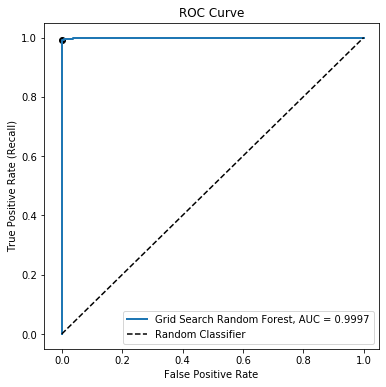

In [51]:
optimize_thresholds_roc("Grid Search Random Forest", grid_search_XGBClassifier, X_test, y_test)


## Unsupervised Anomaly Detection

In [52]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [53]:
df_un = df.copy()
#df_un[X_features] = (df_un[X_features]-df_un[X_features].mean())/df_un[X_features].std()
df_un[X_features]=(df_un[X_features]-df_un[X_features].min())/(df_un[X_features].max()-df_un[X_features].min())

X_un = (df_un[X_features]).to_numpy()
y_un = (df_un['Unusual']).to_numpy()

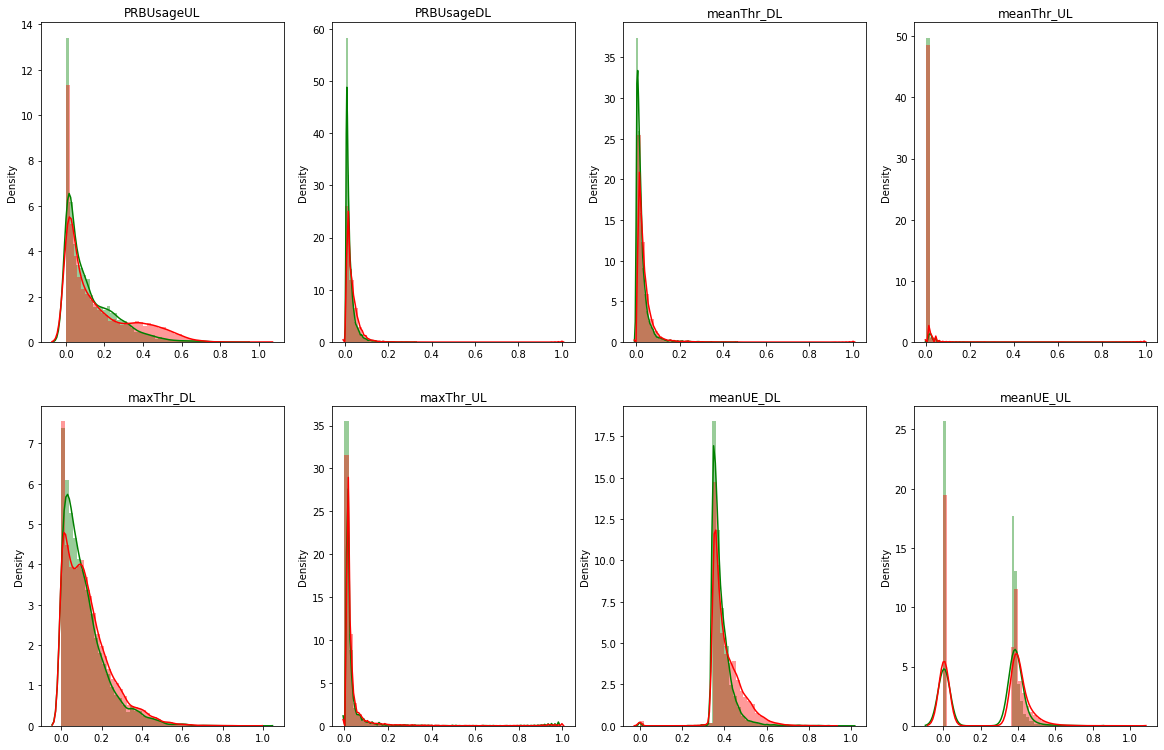

In [54]:
grid = gridspec.GridSpec(3, 4)

plt.figure(figsize=(20,10*2))

X_features = list((df_un.drop('Unusual', axis='columns')).columns)
for n, col in enumerate(X_features):
    ax = plt.subplot(grid[n])
    sns.distplot(df_un[df_un.Unusual==1][col], bins = 50, color='g')
    sns.distplot(df_un[df_un.Unusual==0][col], bins = 50, color='r') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    
plt.show()

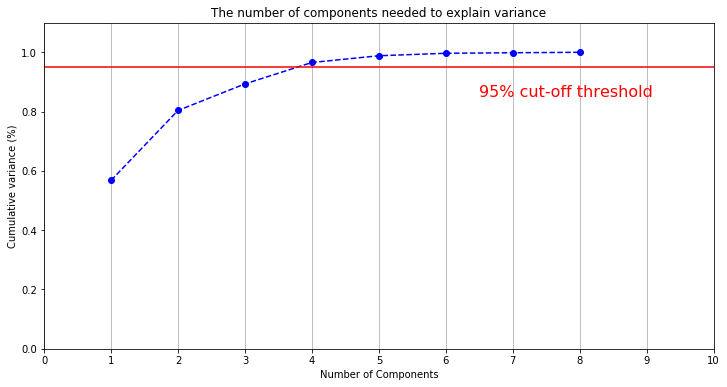

In [55]:
pca = PCA().fit(X_un)
len(pca.explained_variance_ratio_)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 9, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(6.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [56]:
pca = PCA(n_components=4)  # Reduce to k=6 dimensions
X_un_reduce = pca.fit_transform(X_un)

### K-means clustering
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

**n_clusters** The number of clusters to form as well as the number of centroids to generate (default=8).


In [57]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=10)
model.fit(X_un_reduce);

In [58]:
def plot_unusual_KMean(n_cluster, X, y):
    model = KMeans(n_clusters=n_cluster)
    model.fit(X);
    df_cluster = pd.DataFrame({'clusterID': model.labels_, 'Unusual': y})
    n_total = df_cluster.groupby('clusterID')['Unusual'].count()
    n_unusual = df_cluster.groupby('clusterID')['Unusual'].sum()
    ratio_unusual = n_unusual / n_total
    plt.figure(figsize=(10,5))
    ratio_unusual.sort_values().plot(kind='bar')
    plt.title('Ratio of Unusual activitis within each cluster, n_cluster = ' + str(n_cluster) , fontsize=17);
    plt.ylim([0,1])

    plt.axhline(y=0.5, color='r', linestyle='-')
    plt.text(0.5, 0.55, 'Cluster is made of 50% unusual data points', color = 'red', fontsize=16)


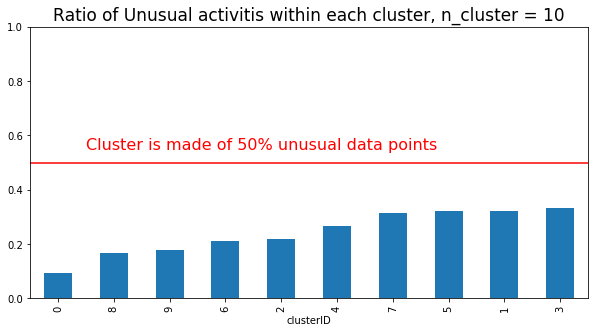

In [59]:
plot_unusual_KMean(10, X_un_reduce, y_un)

[None, None, None, None, None, None, None]

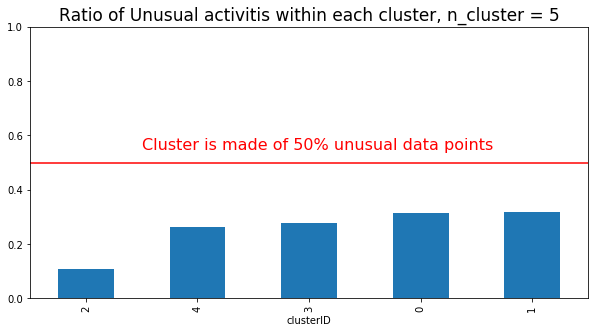

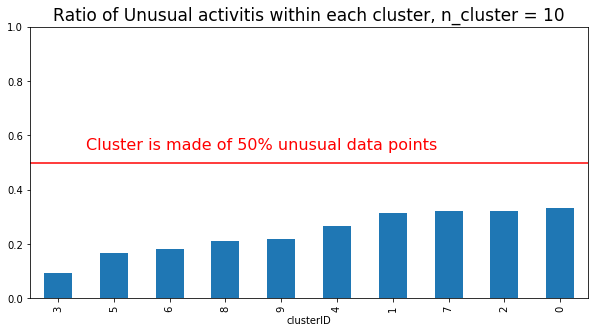

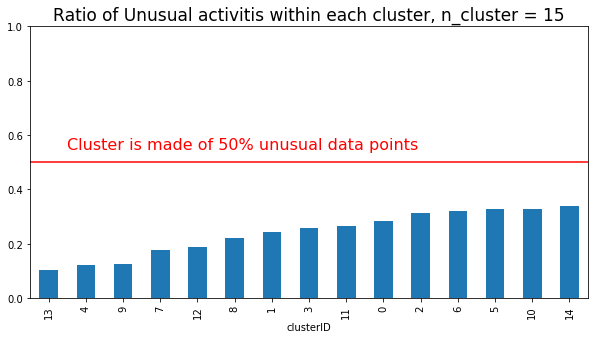

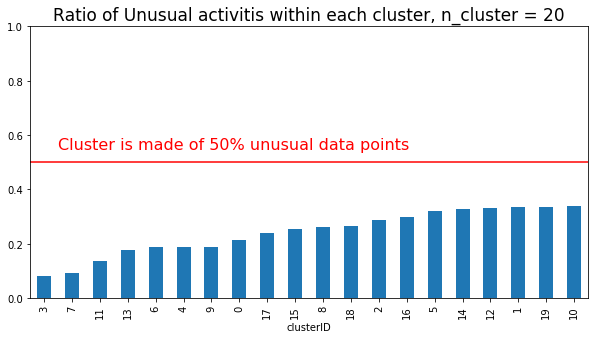

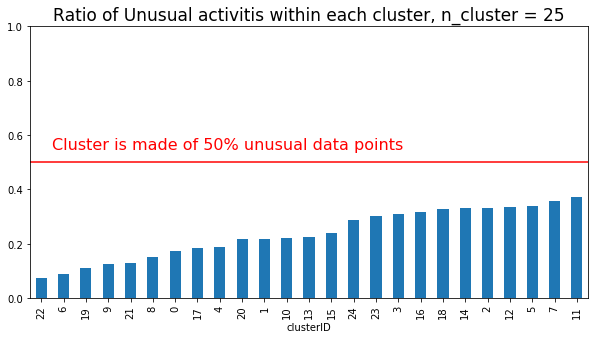

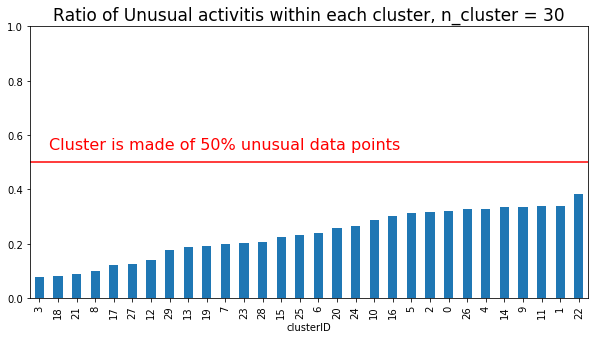

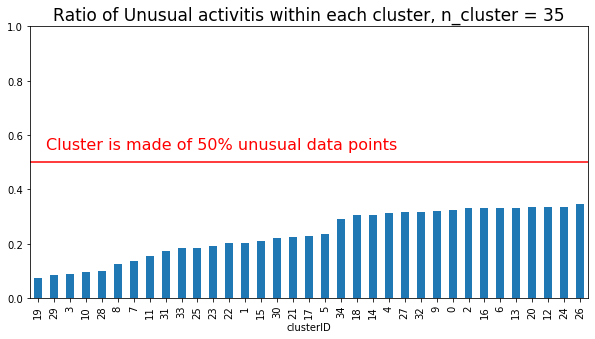

In [60]:
n_cluster = range(5, 40, 5)
#kmeans = [KMeans(n_clusters=i).fit(X_un) for i in n_cluster]
[plot_unusual_KMean(i, X_un_reduce, y_un) for i in n_cluster]

[None, None, None, None, None, None, None]

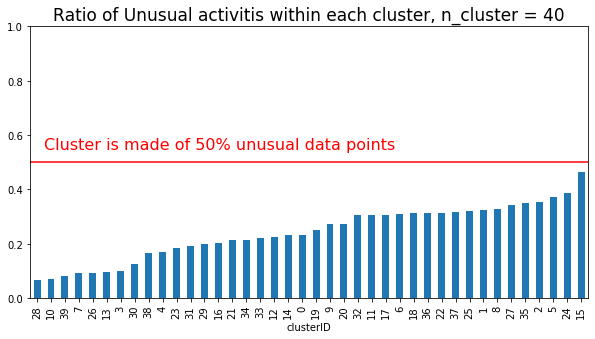

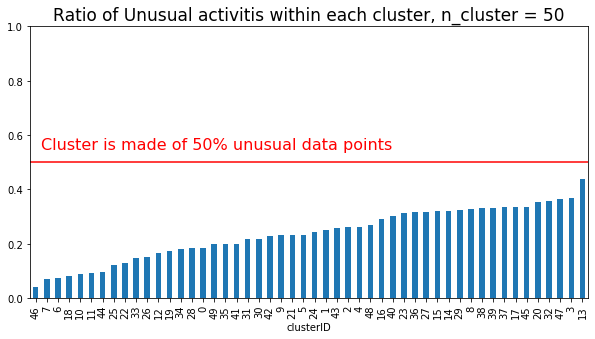

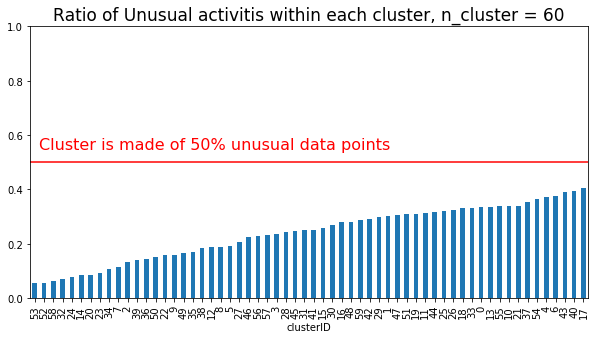

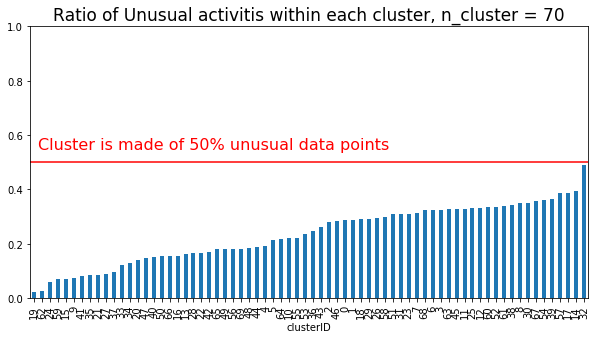

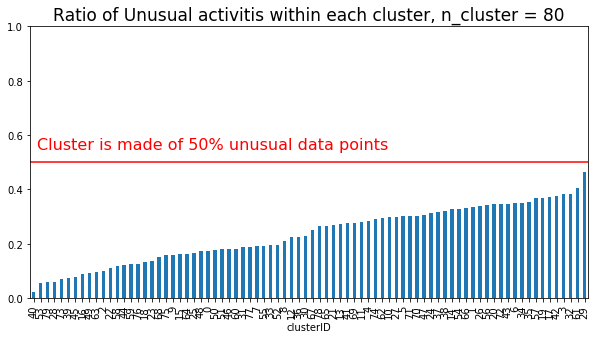

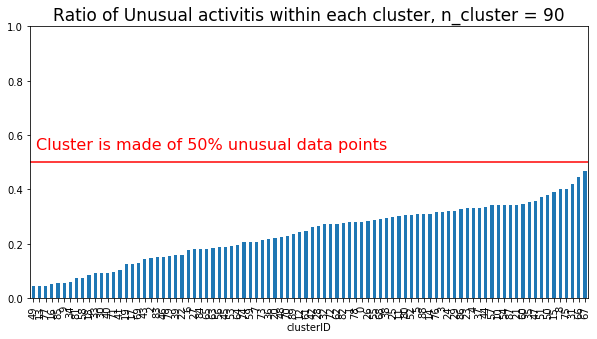

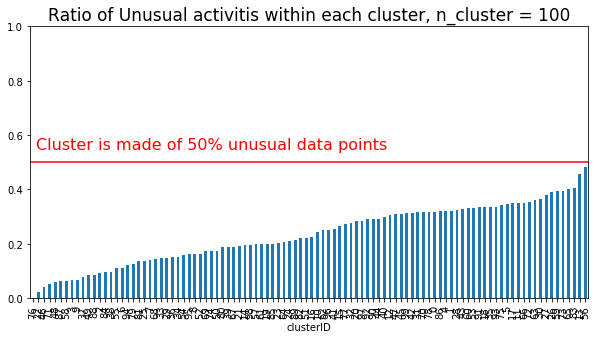

In [61]:
n_cluster = range(40, 110, 10)
#kmeans = [KMeans(n_clusters=i).fit(X_un) for i in n_cluster]
[plot_unusual_KMean(i, X_un_reduce, y_un) for i in n_cluster]

In [63]:
def PointBasedDistance(data, model):
    # Obtain clusters' labels and centers
    model_cluster_allocation = model.labels_;
    model_cluster_centers = model.cluster_centers_;
    distance =[];
    for i in range(len(data)):
        data_point = data[i];
        data_point_cluster_center = np.array(model_cluster_centers[model_cluster_allocation[i]-1]);
        distance.append(np.linalg.norm(data_point-data_point_cluster_center));        
    return distance

def stat_unusual_KMean(n_cluster, X, y):
    model = KMeans(n_clusters=n_cluster);
    model.fit(X);
    distance = PointBasedDistance(X, model);
    df_cluster = pd.DataFrame({'clusterID': model.labels_, 'distance': distance, 'Unusual': y});
    dist_mean = df_cluster[df_cluster['Unusual']==1].groupby('clusterID')['distance'].mean();
    dist_std = df_cluster[df_cluster['Unusual']==1].groupby('clusterID')['distance'].std();
    
    n_total = df_cluster.groupby('clusterID')['Unusual'].count();
    n_unusual = df_cluster.groupby('clusterID')['Unusual'].sum();
    ratio_unusual = n_unusual / n_total;
    plt.figure(figsize=(12,6));
    ratio_unusual.sort_values().plot(kind='bar');
    plt.title('Ratio of Unusual activitis within each cluster, n_cluster = ' + str(n_cluster) , fontsize=17);
    plt.ylim([0,1]);
    plt.axhline(y=0.5, color='r', linestyle='-');
    plt.text(0.5, 0.55, 'Cluster is made of 50% unusual data points', color = 'red', fontsize=16);

    plt.figure(figsize=(12,6))
    ax = sns.boxplot(x="clusterID", y="distance", hue="Unusual", data=df_cluster);
    plt.title('Distance from cluster center within each cluster, n_cluster = ' + str(n_cluster) , fontsize=17);
    
    return model, ratio_unusual, dist_mean, dist_std
    

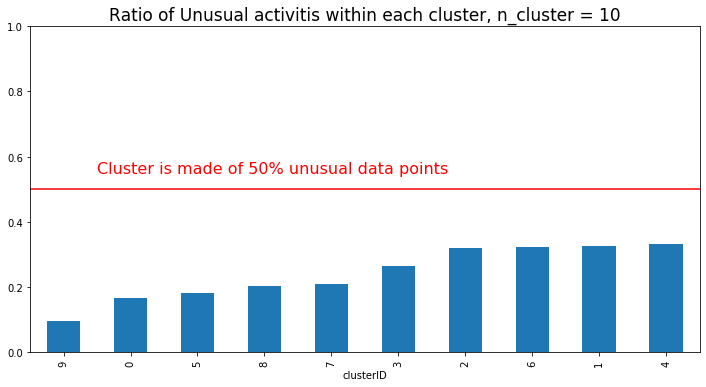

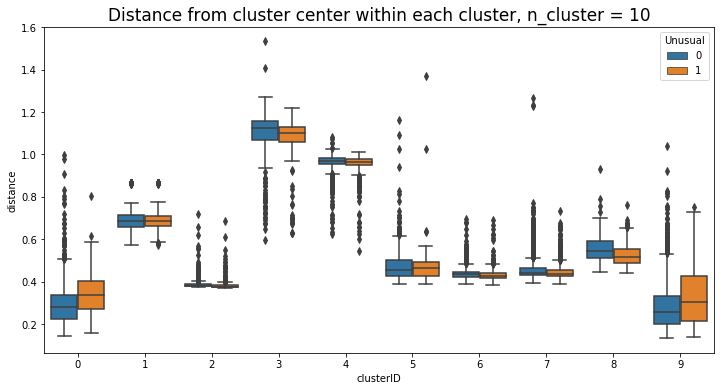

In [64]:
model, ratio_unusual, dist_mean, dist_std = stat_unusual_KMean(10, X_un, y_un)

In [65]:
def split_to_train_test(df, label_column, train_frac=0.8):
    train_df, test_df = pd.DataFrame(), pd.DataFrame()
    labels = df[label_column].unique()
    for lbl in labels:
        lbl_df = df[df[label_column] == lbl]
        lbl_train_df = lbl_df.sample(frac=train_frac)
        lbl_test_df = lbl_df.drop(lbl_train_df.index)
        print('\n%s:\n---------\ntotal:%d\ntrain_df:%d\ntest_df:%d' % (lbl, len(lbl_df), len(lbl_train_df), len(lbl_test_df)))
        train_df = train_df.append(lbl_train_df)
        test_df = test_df.append(lbl_test_df)

    return train_df, test_df

In [66]:
df2 = df_un.copy()

In [67]:
df_train, df_test = split_to_train_test(df2, 'Unusual', 0.8)

X_train_un = (df_train[X_features]).to_numpy()
y_train_un = (df_train['Unusual']).to_numpy()

X_test_un = (df_test[X_features]).to_numpy()
y_test_un = (df_test['Unusual']).to_numpy()


1:
---------
total:10167
train_df:8134
test_df:2033

0:
---------
total:26648
train_df:21318
test_df:5330


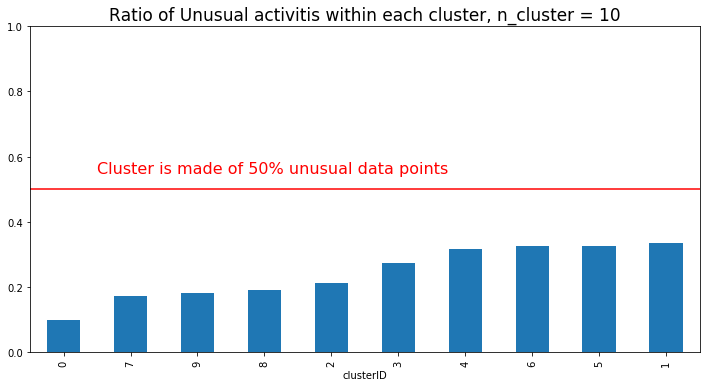

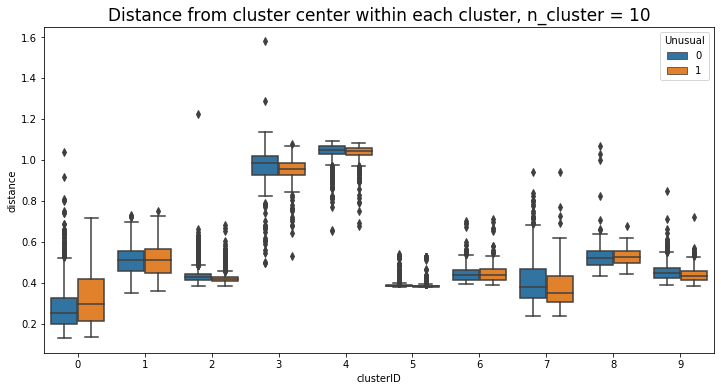

In [68]:
model, ratio_unusual, dist_mean, dist_std = stat_unusual_KMean(10, X_train_un, y_train_un)

In [69]:
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density


cluster_ID = model.predict(X_test_un)
distance = PointBasedDistance(X_test_un, model)
mu = dist_mean[cluster_ID]
sigma = dist_std[cluster_ID] 

p = normal_dist(distance, mu, sigma)
y_prediction = ratio_unusual[cluster_ID]*p

threshold = 0.01
y_pred = (y_prediction >= threshold).astype(int)
model_report("KMean on test dataset", y_test_un, y_pred)



 Unusual Activity Prediction using KMean on test dataset



,Predcited: Normal,Predcited: Unusual
Actual: Normal,TN = 3780,FP = 1550
Actual: Unusual,FN = 1483,TP = 550


,precision,recall,f1-score,support
Normal,0.718222,0.709193,0.713679,5330.0
Unusual,0.261905,0.270536,0.266150,2033.0
avg/Total,0.592228,0.588076,0.590112,7363.0
